In [21]:
import re
import pandas as pd

In [22]:
f=open('WhatsApp Chat with चुत्सपा!!!.txt','r',encoding='utf-8')

In [23]:
data=f.read()
#print(data)

In [24]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s[a,p]m\s-\s'

In [25]:
messages=re.split(pattern,data)[1:]
messages

['दोबरू: Din din ka bnate hai\n',
 'दोबरू: Bahar khaa pee aur phook lenge\n',
 'दोबरू: Bolo?\n',
 'दोबरू: Bolo lawdo\n',
 'अनुज विलियन: Bhai saare bolo\n',
 'पौगौ: @919910919008 i am no game bro\n',
 'अनुज विलियन: 1-2 bje??\n',
 'दोबरू: 2baje👌\n',
 'अनुज विलियन: Karunga Teri gand marunga na kal\n',
 'लल्लू टिक्की: Abe.. shakal chut Jaisi hai,baatein toh dhang ki Kar Liya karo\n',
 'अनुज विलियन: Chal be jhaatu\n',
 'अनुज विलियन: Shoo shoo\n',
 'लल्लू टिक्की: Sanket is going out\n',
 'लल्लू टिक्की: Jagah dekh lo abh kaha kya karna hai.\n',
 'लल्लू टिक्की: Cemented is always there. MATLAB khaali building ke chatt pe ghuss ke Beth sakte hain\n',
 'लल्लू टिक्की: But uncle log pakad sakte hain\n',
 'Piyush: Haan wo to tab hai jab kuch nhi bacha hamare paas\n',
 'Piyush: Misha ka hoga khaali din din ke liye?\n',
 'लल्लू टिक्की: No\n',
 'लल्लू टिक्की: Gharwale toh hote hain ghar pe lund\n',
 'दोबरू: 1:30 pahuch jana dot. Jagah nahi hai wait karne ki. Time oe aa jaana\n',
 'लल्लू टिक्की: <Media

In [26]:
dates= re.findall(pattern,data)
dates

['30/12/17, 8:16 pm - ',
 '30/12/17, 8:16 pm - ',
 '30/12/17, 8:16 pm - ',
 '30/12/17, 9:22 pm - ',
 '30/12/17, 9:27 pm - ',
 '30/12/17, 9:27 pm - ',
 '30/12/17, 9:33 pm - ',
 '30/12/17, 9:33 pm - ',
 '31/12/17, 12:50 am - ',
 '31/12/17, 12:50 am - ',
 '31/12/17, 12:51 am - ',
 '31/12/17, 12:51 am - ',
 '31/12/17, 1:07 am - ',
 '31/12/17, 1:07 am - ',
 '31/12/17, 10:15 am - ',
 '31/12/17, 10:15 am - ',
 '31/12/17, 10:16 am - ',
 '31/12/17, 10:16 am - ',
 '31/12/17, 10:17 am - ',
 '31/12/17, 10:17 am - ',
 '31/12/17, 12:25 pm - ',
 '31/12/17, 1:26 pm - ',
 '31/12/17, 1:27 pm - ',
 '31/12/17, 1:29 pm - ',
 '31/12/17, 1:38 pm - ',
 '31/12/17, 1:38 pm - ',
 '31/12/17, 1:38 pm - ',
 '31/12/17, 1:39 pm - ',
 '31/12/17, 1:39 pm - ',
 '31/12/17, 1:43 pm - ',
 '31/12/17, 1:43 pm - ',
 '31/12/17, 1:43 pm - ',
 '31/12/17, 1:45 pm - ',
 '31/12/17, 1:45 pm - ',
 '31/12/17, 1:45 pm - ',
 '31/12/17, 1:45 pm - ',
 '31/12/17, 1:46 pm - ',
 '31/12/17, 1:46 pm - ',
 '31/12/17, 1:46 pm - ',
 '31/12/17, 1:

In [27]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format = '%d/%m/%y, %I:%M %p - ')
df.rename(columns={'message_date' : 'date'}, inplace=True)
df.head()

,user_message,date
0,दोबरू: Din din ka bnate hai\n,2017-12-30 20:16:00
1,दोबरू: Bahar khaa pee aur phook lenge\n,2017-12-30 20:16:00
2,दोबरू: Bolo?\n,2017-12-30 20:16:00
3,दोबरू: Bolo lawdo\n,2017-12-30 21:22:00
4,अनुज विलियन: Bhai saare bolo\n,2017-12-30 21:27:00


In [28]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name exists
        users.append(entry[1])
        messages.append(entry[2])
    else: 
        users.append('group notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,user,message
0,2017-12-30 20:16:00,दोबरू,Din din ka bnate hai\n
1,2017-12-30 20:16:00,दोबरू,Bahar khaa pee aur phook lenge\n
2,2017-12-30 20:16:00,दोबरू,Bolo?\n
3,2017-12-30 21:22:00,दोबरू,Bolo lawdo\n
4,2017-12-30 21:27:00,अनुज विलियन,Bhai saare bolo\n


In [29]:
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [30]:
df[10:]

,date,user,message,month,day,hour,minute
10,2017-12-31 00:51:00,अनुज विलियन,Chal be jhaatu\n,December,31,0,51
11,2017-12-31 00:51:00,अनुज विलियन,Shoo shoo\n,December,31,0,51
12,2017-12-31 01:07:00,लल्लू टिक्की,Sanket is going out\n,December,31,1,7
13,2017-12-31 01:07:00,लल्लू टिक्की,Jagah dekh lo abh kaha kya karna hai.\n,December,31,1,7
14,2017-12-31 10:15:00,लल्लू टिक्की,Cemented is always there. MATLAB khaali buildi...,December,31,10,15
...,...,...,...,...,...,...,...
12379,2022-10-05 11:18:00,Piyush,https://youtu.be/do2IVAjnoJU\n,October,5,11,18
12380,2022-11-07 17:51:00,Piyush,<Media omitted>\n,November,7,17,51
12381,2022-11-07 17:54:00,पूस्सी,Sati\n,November,7,17,54
12382,2022-11-07 17:55:00,Piyush,"4 saal ho gaye, barsi hai aaj.\n",November,7,17,55


In [31]:
all_msgs=[]
for message in df['message']:
        all_msgs.extend(message.split())

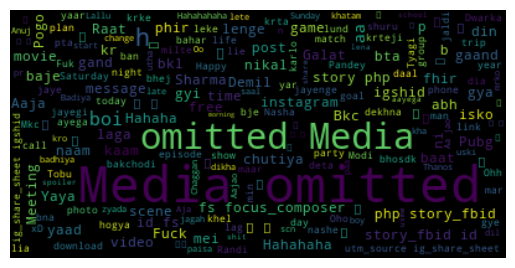

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<Figure size 640x480 with 0 Axes>

In [32]:
import streamlit as st
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
plt.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
# Create some sample text
text = 'Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing'

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(" ".join(all_msgs))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
st.pyplot()

In [33]:
df[df['message'] == '<Media omitted>\n'].shape[0]

1602

In [34]:
z=df['user'].value_counts()[:-1]

In [35]:
name= z.index
count= z.values

C:\Users\justp\.conda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\justp\.conda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\justp\.conda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2380 (\N{DEVANAGARI VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\justp\.conda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\justp\.conda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(byt

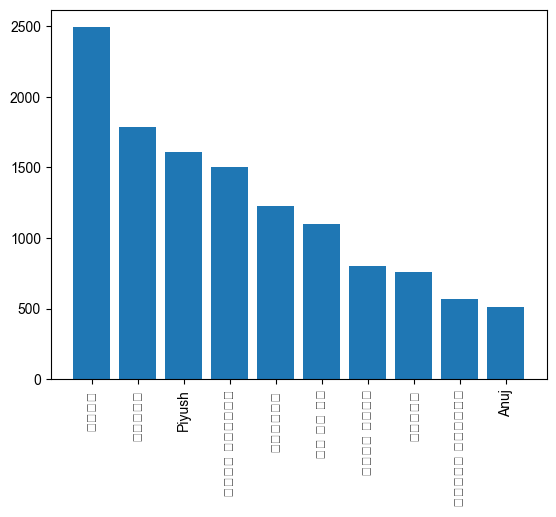

In [36]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'Name','user':'Percentage'})

,Name,Percentage
0,पौगौ,20.12
1,तुसार,14.43
2,Piyush,13.00
3,अनुज विलियन,12.12
4,पूस्सी,9.92
5,ती या गी,8.88
6,टौबौ बेटे,6.45
7,दोबरू,6.16
8,लल्लू टिक्की,4.61
9,Anuj,4.13


In [38]:
from urlextract import URLExtract
#extract = URLExtract()
selected_user='Piyush'

In [110]:
import emoji
f= open('stop_hinglish.txt','r')
stop_words= f.read()
stop_words = STOPWORDS.update(stop_words.split('\n'))
if selected_user != 'Overall':
    df = df[df['user']== selected_user]

emojis=[]
for message in df['message']:
    emojis.extend(emoji.emoji_list(message))   
    
temp =df[df['user']!= 'group notification']
temp=temp[temp['message'] != '<Media omitted>\n']

words=[]

def remove_stopwords(msg):
    y=[]
    for word in msg.lower().split():
        if word not in stop_words and word not in [i['emoji'] for i in emojis]:
            y.append(word)
    return " ".join(y)

wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white',stopwords=stop_words)
temp['message']=temp['message'].apply(remove_emoji)
df_wc= wc.generate(temp['message'].str.cat(sep=" "))

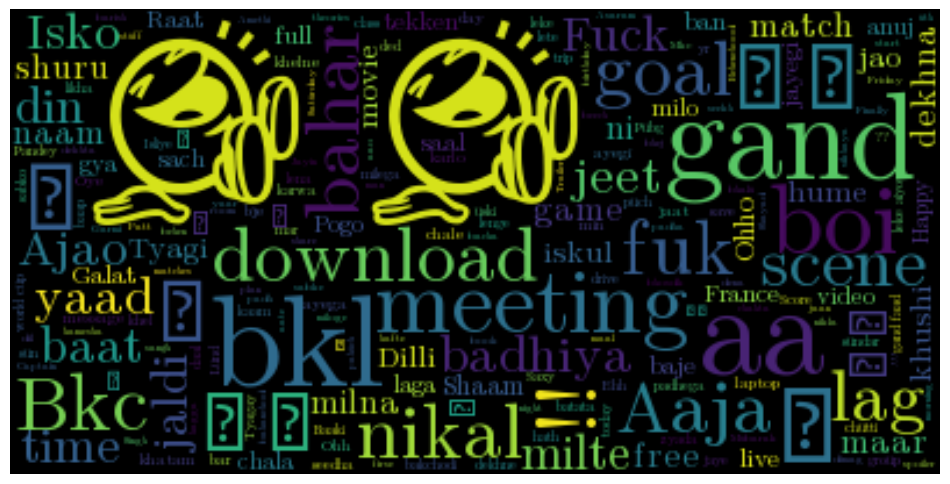

In [113]:
import string
import io
import os
from os import path
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

normal_word = r"(?:\w[\w']+)"
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
emoji_reg = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji_reg}".format(normal_word=normal_word, ascii_art=ascii_art, emoji_reg=emoji_reg)

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join(d,'Symbola.ttf')
wordcloud = WordCloud(font_path=font_path, regexp=regexp, background_color='black', contour_width=5, contour_color='#00A9FF').generate(temp['message'].str.cat(sep=" "))
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

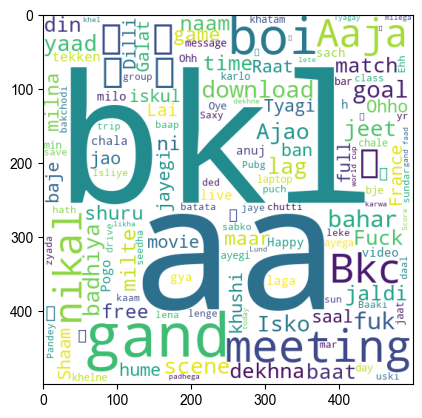

In [111]:
%matplotlib inline
plt.imshow(df_wc)

In [40]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

    text = emoji_pattern.sub(r'', text)
    return text


In [257]:
f= open('stop_hinglish.txt','r')
stop_words= f.read()
zzz=stop_words.split('\n')
zzz

['youtube',
 'facebook',
 'watch v',
 'deleted',
 'https',
 'youtu.be',
 'watch',
 'v',
 'https://',
 'hai',
 'www.',
 'hai.',
 'hai?',
 'nhi',
 'ye',
 'bhi',
 'tha',
 'mein',
 'ho',
 'ke',
 'hi',
 '.',
 '..',
 '...',
 '?',
 '-',
 '--',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 'a',
 'aadi',
 'aaj',
 'aap',
 'aapne',
 'aata',
 'aati',
 'aaya',
 'aaye',
 'ab',
 'abbe',
 'abbey',
 'abe',
 'abhi',
 'able',
 'about',
 'above',
 'accha',
 'according',
 'accordingly',
 'acha',
 'achcha',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 'agar',
 'ain',
 'aint',
 "ain't",
 'aisa',
 'aise',
 'aisi',
 'alag',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'andar',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ap',
 'apan',
 'apart',
 'apna',
 'apnaa',
 'apne',
 'apni',
 'appear',
 'are',
 'aren'

In [114]:
df['day_name']= df['date'].df.day_name()

AttributeError: 'Series' object has no attribute 'df'